In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"E:\PGDA 41\ALL COMPLETE ASSIGNMENT\Machine Learning\Regression Project\airbnb_coastal_prices.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (300, 9)


,ListingID,City,Bedrooms,Bathrooms,Distance to Beach (km),Has AC,Season,Rating,Price (INR)
0,1,Kochi,1,1,0.42,0,Shoulder,2.6,2466.18
1,2,Vizag,3,2,0.28,1,Off,3.2,4415.04
2,3,Kochi,2,3,7.71,1,Off,2.7,2448.61
3,4,Goa,1,2,1.62,1,Shoulder,3.2,2373.11
4,5,Kochi,4,3,3.40,0,Peak,4.2,9178.04


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ListingID               300 non-null    int64  
 1   City                    300 non-null    object 
 2   Bedrooms                300 non-null    int64  
 3   Bathrooms               300 non-null    int64  
 4   Distance to Beach (km)  300 non-null    float64
 5   Has AC                  300 non-null    int64  
 6   Season                  300 non-null    object 
 7   Rating                  300 non-null    float64
 8   Price (INR)             300 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 21.2+ KB
None
        ListingID    Bedrooms   Bathrooms  Distance to Beach (km)      Has AC  \
count  300.000000  300.000000  300.000000              300.000000  300.000000   
mean   150.500000    2.500000    2.016667                4.833767    0.506667   
st

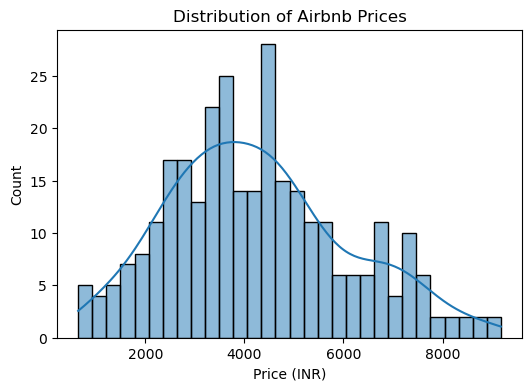

In [15]:
# EDA - Distribution of Target
plt.figure(figsize=(6, 4))
sns.histplot(df["Price (INR)"], bins=30, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.show()

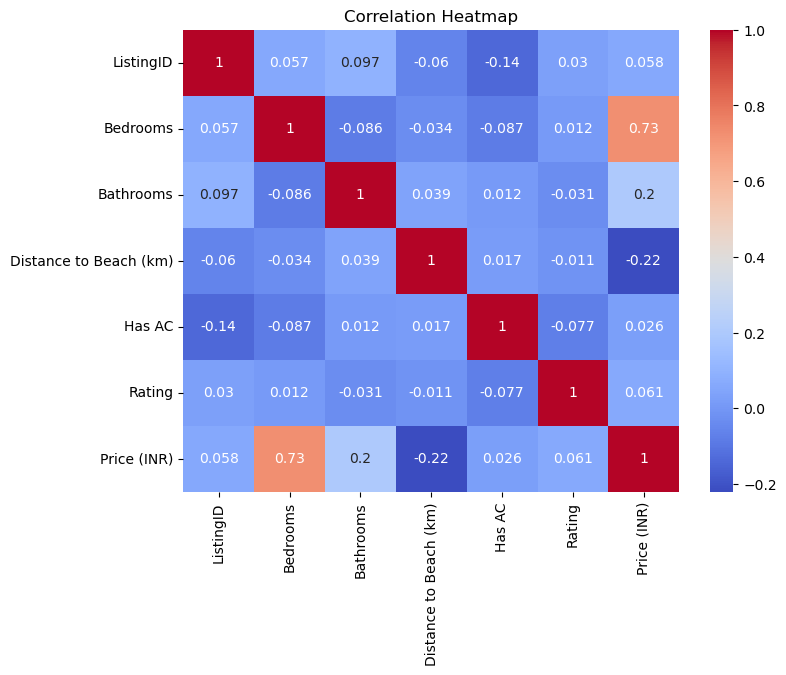

In [17]:
# Correlation Heatmap (for numerical only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

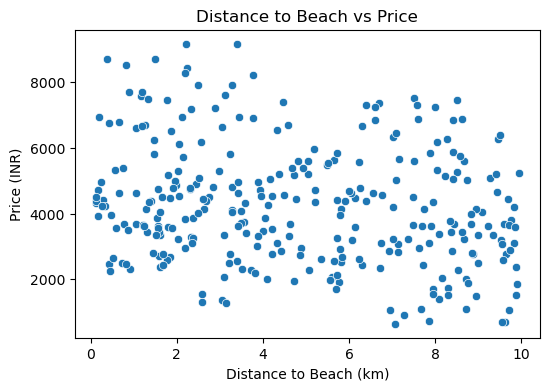

In [19]:
# Scatter Plot: Distance vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Distance to Beach (km)", y="Price (INR)", data=df)
plt.title("Distance to Beach vs Price")
plt.show()

In [21]:
categorical_cols = ["City", "Season"]
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

In [23]:
X = pd.concat([df.drop(columns=["ListingID", "City", "Season", "Price (INR)"]), encoded_df], axis=1)
y = df["Price (INR)"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print("Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:.2f}")

Model Performance:
R² Score: 0.86
Mean Absolute Error (MAE): ₹523.68
Mean Squared Error (MSE): ₹488738.86


In [35]:
df["Predicted_Price"] = model.predict(X)
df.to_csv("airbnb_price_predictions.csv", index=False)